In [1]:
import pandas as pd
import numpy as np
import prework as pwk
import string
from time import time

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score, accuracy_score, precision_score, roc_auc_score
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models.doc2vec import LabeledSentence, Doc2Vec
from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import spacy
spc_nlp = spacy.load('en')

In [3]:
root = 'data/ICNALE/Unmerged_classified'
#root = 'data/pilot3'

In [4]:
df_orig = pwk.load_data_multi(root)
df_orig.head(1)

5600


,doc_id,path,author_code,essay_content,label
0,1,data/ICNALE/Unmerged_classified/ICNALE_W_CHN_A...,W_CHN_PTJ0_021_A2_0.txt,﻿I agree that it is important for college stud...,CHN


In [180]:
df_orig['topic'] = df_orig['author_code'].apply(lambda x: x[6:9])

In [185]:
for c in countries:
    print df_orig[(df_orig['label']==c)&(df_orig['topic']=='SMK')].shape[0]*1./df_orig[(df_orig['label']==c)].shape[0]

0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5
0.5


In [5]:
cond = (df_orig['label']=='HKG')|(df_orig['label']=='TWN')
df_0 = df_orig.drop(df_orig[cond].index, axis=0)

In [6]:
countries = list(df_0.groupby('label').size().index)
sample_count = df_0.groupby('label').size().values

In [7]:
countries

['CHN', 'ENS', 'IDN', 'JPN', 'KOR', 'PAK', 'PHL', 'SIN', 'THA']

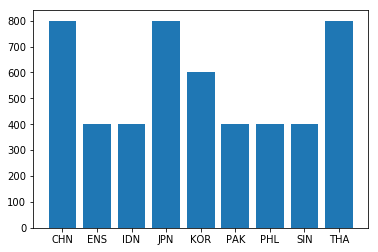

In [274]:
fig, ax = plt.subplots()
ax.bar(range(len(countries)), sample_count)
#ax.xticks = countries
plt.xticks(range(len(countries)), countries)
#fig.set_size_inches(18.5, 10.5, forward=True)
fig.show()

**-**

## Explore ENS-XXX tfidf and logistic regression

In [237]:
#cond = df_0['topic']=='SMK'
#df_0.drop(df_0[cond].index, axis=0, inplace=True)

In [275]:
df_0.shape

(5000, 6)

In [457]:
#X = df_0['essay_content']
#y = df_0['label']
X = df_0[(df_0['label']=='ENS')|(df_0['label']=='PHL')]['essay_content']
#X = df_0[(df_0['label']=='ENS')|(df_0['label']=='CHN')][['topic','label','essay_content']]
y = df_0[(df_0['label']=='ENS')|(df_0['label']=='PHL')]['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6)

In [458]:
X.shape

(800,)

In [540]:
vectorizer = TfidfVectorizer(lowercase=True, max_features=109)
X_train_dtm = vectorizer.fit_transform(X_train)
X_test_dtm = vectorizer.transform(X_test)

In [541]:
X_train_dtm.shape

(480, 109)

In [542]:
#clf = LogisticRegression(penalty='l2', C=0.8)
clf = LogisticRegression()
#clf.fit(X_train_dtm[120:140], y_train[120:140])
clf.fit(X_train_dtm, y_train)
y_pred = clf.predict(X_test_dtm)

In [543]:
vocab = np.array(vectorizer.get_feature_names())

In [544]:
np.sort(clf.coef_[0])[::-1][:15]

array([ 2.18115115,  1.76086047,  1.48847138,  1.31800907,  1.24729759,
        1.15171017,  1.1232396 ,  1.09134445,  1.07075511,  1.03397944,
        1.02444455,  1.00927477,  1.00879661,  1.00334417,  0.99025103])

### So when max_feature=108, 'japan' did not show up, but when it was turned to 109, 'japan' became the feature with highest coefficient

In [546]:
vocab[np.argsort(clf.coef_[0])[::-1][:15]]

array([u'japan', u'that', u'and', u'think', u'to', u'was', u'at', u'with',
       u'many', u'have', u'do', u'work', u'this', u'so', u'would'], 
      dtype='<U11')

In [547]:
accuracy_score(y_test, y_pred)

0.87812500000000004

In [560]:
D = X_train_dtm.todense()[y_train=='ENS']

In [561]:
np.array(np.sum(D, axis=0))[0][np.argsort(clf.coef_)[::-1][0][:]]

array([   0.        ,   55.88969878,   73.91491239,   82.03819435,
        107.15628267,    0.        ,   21.15305141,   31.35357162,
         11.69433431,   46.37643388,   29.69743493,    0.        ,
          9.65329582,   32.67401464,    0.        ,   30.90057106,
         13.94751146,   15.31532843,    9.3372252 ,   53.42426178,
         38.68365426,    0.        ,    0.        ,   10.23884821,
          0.        ,    8.9568844 ,   60.78136711,   36.83446964,
         18.96996235,   35.91849325,   40.5262032 ,    0.        ,
          0.        ,    0.        ,    0.        ,   40.7334952 ,
          0.        ,   11.23941973,   28.39915641,    0.        ,
         14.8275953 ,   15.67925371,    0.        ,   68.00519243,
         10.58537742,   41.60591958,   15.06701076,    0.        ,
         15.36611937,   71.75975171,   14.41715367,   12.98838004,
         30.71675322,    0.        ,   59.45883419,   14.73418153,
         80.6332614 ,   30.73223873,   11.49148648,    0.     

In [558]:
D = X_train_dtm.todense()[y_train=='PHL']

/Library/Python/2.7/site-packages/numpy/matrixlib/defmatrix.py:318: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
  out = N.ndarray.__getitem__(self, index)


In [559]:
np.array(np.sum(D, axis=0))[0][np.argsort(clf.coef_)[::-1][0][:]]

array([   0.        ,   56.05868179,   75.82365455,   83.26531416,
        111.96496328,    0.        ,   19.4608073 ,   32.32237781,
         12.71123295,   50.40916726,   32.27982057,    0.        ,
          8.88103215,   35.5152333 ,    0.        ,   30.99399921,
         15.16033855,   16.64709612,    8.59024718,   58.06984976,
         39.87895553,    0.        ,    0.        ,    9.41974035,
          0.        ,    9.73574392,   61.52923403,   40.037467  ,
         20.61952429,   33.04501379,   44.05022087,    0.        ,
          0.        ,    0.        ,    0.        ,   40.85665329,
          0.        ,   12.21676058,   30.86864828,    0.        ,
         16.11695142,   17.04266708,    0.        ,   65.94502923,
         11.50584502,   39.99988919,   16.37718561,    0.        ,
         16.70230366,   69.98360333,   15.6708192 ,   11.94930963,
         29.53105562,    0.        ,   62.12707292,   16.01541471,
         74.18260049,   33.40460732,   12.49074617,    0.     

In [626]:
#X = df_0['essay_content']
#y = df_0['label']
X = df_0[(df_0['label']=='ENS')|(df_0['label']=='CHN')]['essay_content']
#X = df_0[(df_0['label']=='ENS')|(df_0['label']=='CHN')][['topic','label','essay_content']]
y = df_0[(df_0['label']=='ENS')|(df_0['label']=='CHN')]['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6)

In [627]:
vectorizer = CountVectorizer(lowercase=True, max_features=30)
X_train_dtm = vectorizer.fit_transform(X_train)
X_test_dtm = vectorizer.transform(X_test)
clf = LogisticRegression()
#clf.fit(X_train_dtm[120:140], y_train[120:140])
clf.fit(X_train_dtm, y_train)
y_pred = clf.predict(X_test_dtm)

In [628]:
accuracy_score(y_test, y_pred)

0.9145833333333333

In [629]:
vocab = np.array(vectorizer.get_feature_names())
print np.sort(clf.coef_[0])[::-1][:15]
print vocab[np.argsort(clf.coef_)[::-1][0][:15]]

[ 0.79235975  0.59077439  0.33157387  0.26595186  0.2368374   0.22291331
  0.19714045  0.19497698  0.18059626  0.1638692   0.10053051  0.09731849
  0.02451165 -0.02388487 -0.09135788]
[u'we' u'part' u'more' u'can' u'people' u'smoking' u'it' u'all' u'the'
 u'will' u'college' u'should' u'students' u'are' u'they']


In [630]:
print clf.coef_

[[-0.42081373  0.59077439 -0.14148887 -0.02388487  0.1638692  -0.69220615
  -0.21262142  0.02451165  0.33157387  0.09731849 -0.09135788 -0.43267957
   0.19497698 -0.87356237  0.2368374   0.18059626 -0.87689769 -0.61087598
   0.26595186 -0.2088983  -0.47646001 -0.16983018  0.79235975 -0.24711628
   0.10053051 -0.13499459  0.19714045  0.22291331 -0.95181798 -0.22969369]]


In [633]:
D = X_train_dtm.todense()[y_train=='ENS']
np.array(np.sum(D, axis=0))[0][np.argsort(clf.coef_)[::-1][0][:]]

array([3120, 2400,  720, 2880, 2400, 1920, 2400,    0, 6480, 1680,    0,
        240,  240, 1440, 1680, 3840, 2160,    0, 2400,    0,    0, 1680,
       1920, 4080, 4560, 1920,  480, 1680, 3840, 2160])

In [634]:
D = X_train_dtm.todense()[y_train=='CHN']
np.array(np.sum(D, axis=0))[0][np.argsort(clf.coef_)[::-1][0][:]]

array([6240, 4800, 1440, 3600, 1920,  960, 2640,    0, 7200, 2640,    0,
        480,  480,  720, 1200, 3360, 1440,    0, 2640,    0,    0, 1200,
       3840, 6000, 5520, 2400,  240, 1920, 4080, 1440])

In [635]:
np.mean(D, axis=0)

matrix([[  0.        ,   5.66666667,   1.        ,   2.        ,
           0.        ,   5.        ,   0.        ,   0.        ,
           2.66666667,   3.66666667,   4.66666667,   3.66666667,
           5.33333333,   2.        ,   3.33333333,   1.66666667,
           6.66666667,   2.66666667,   0.33333333,   0.66666667,
           1.33333333,   0.66666667,   2.        ,  10.        ,
           0.        ,   1.66666667,   8.33333333,   7.66666667,
           8.66666667,   3.66666667]])

In [573]:
vocab

array([u'and', u'are', u'as', u'be', u'can', u'college', u'for', u'have',
       u'in', u'is', u'it', u'job', u'more', u'not', u'of', u'part',
       u'people', u'restaurants', u'should', u'smoking', u'students',
       u'that', u'the', u'their', u'they', u'time', u'to', u'we', u'will',
       u'you'], 
      dtype='<U11')

**--**

## Simple Models on tfidf

In [261]:
pipeline_lgr = Pipeline([
    ('vect', TfidfVectorizer(lowercase=True, max_features=50)),
    ('clf', LogisticRegression())
])
scores = cross_val_score(pipeline_lgr, X_train, y_train, cv=5)
print scores

[ 0.93150685  0.91780822  0.91666667  0.95774648  0.92957746]


In [30]:
pipeline_mnb = Pipeline([
    ('vect', CountVectorizer(lowercase=True, max_features=900)),
    ('clf', MultinomialNB())
])
scores = cross_val_score(pipeline_mnb, X_train, y_train, cv=5)
print scores

[ 0.96875     0.95833333  0.95833333  1.          1.        ]


In [55]:
pipeline_rf = Pipeline([
    ('vect', TfidfVectorizer(lowercase=True, max_features=900)),
    ('clf', RandomForestClassifier(n_estimators=100))
])
scores = cross_val_score(pipeline_rf, X_train, y_train, cv=5)
print scores

[ 0.70178926  0.71115538  0.68463074  0.68072289  0.72782258]


In [60]:
pipeline_svm = Pipeline([
    ('vect', TfidfVectorizer(lowercase=True, max_features=900)),
    ('clf', LinearSVC())
])
scores = cross_val_score(pipeline_svm, X_train, y_train, cv=5)
print scores

[ 0.87077535  0.86454183  0.86826347  0.86746988  0.89314516]


### total sentence count

In [30]:
start = time()
total_sents = df_orig['essay_content'].apply(lambda x: len([s for s in spc_nlp(x.decode('utf-8')).sents]))
end = time()
duration = end - start
print duration

407.460764885


(array([ 0.00107143,  0.00938776,  0.06045918,  0.07479592,  0.08913265,
         0.02954082,  0.01617347,  0.00321429,  0.00158163,  0.00035714]),
 array([  1. ,   4.5,   8. ,  11.5,  15. ,  18.5,  22. ,  25.5,  29. ,
         32.5,  36. ]),
 <a list of 10 Patch objects>)

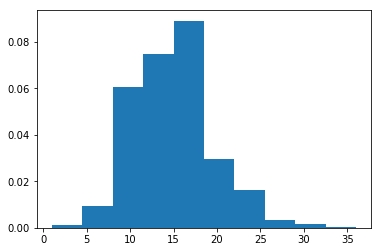

In [101]:
plt.hist(total_sents, bins = 10, normed=1)

In [102]:
np.median(total_sents)

14.0

## Generate POS tag and Arch body

In [11]:
df_0['DT_pos'] = df_0['essay_content'].apply(lambda x: [' '.join([token.pos_ for token in spc_nlp(s.text)]) for s in spc_nlp(x.decode('utf-8')).sents])

In [64]:
#df_0['DT_pos_archs'][0]

In [23]:
df_0['DT_archs'] = df_0['essay_content'].apply(lambda x: [' '.join([token.dep_ for token in spc_nlp(s.text)]) for s in spc_nlp(x.decode('utf-8')).sents])

In [41]:
df_0['DT_pos_archs'] = df_0['essay_content'].apply(lambda x: [' '.join([token.pos_+' '+token.dep_ for token in spc_nlp(s.text)]) for s in spc_nlp(x.decode('utf-8')).sents])

### Run MNB on pos tfidf

In [6]:
df_0 = df_test

In [48]:
df_0['DT_pos_archs_join'] = df_0['DT_pos_archs'].apply(lambda x: ' '.join(x))

In [32]:
X = df_0['DT_pos_archs_join']
y = df_0['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [33]:
pipeline_mnb = Pipeline([
    ('vect', CountVectorizer(ngram_range=(4,4))),
    ('clf', MultinomialNB())
])
scores = cross_val_score(pipeline_mnb, X_train, y_train, cv=5)
print scores

[ 0.68656716  0.6957606   0.68836045  0.71553885  0.6825596 ]


In [67]:
#df_0.to_pickle('df_pos_arch.pkl')

In [8]:
df_0 = pd.read_pickle('df_pos_arch.pkl')

In [9]:
df_0.columns

Index([u'doc_id', u'path', u'author_code', u'essay_content', u'label',
       u'DT_pos', u'DT_pos_join', u'DT_archs', u'DT_arch_join',
       u'DT_pos_archs', u'DT_pos_archs_join'],
      dtype='object')

In [5]:
pd.set_option('display.max_colwidth', -1)
df_test.shape

(5000, 11)

## Test Doc2Vec

In [43]:
lmtzr = WordNetLemmatizer()
df_0['doc2vec_lm_token'] = df_0['essay_content'].apply(lambda x: [token.lemma_ for token in spc_nlp(x.decode('utf-8')) if token.is_punct==False])


In [12]:
n = 3
df_0['DT_insent_arch_ngram'] = df_0['DT_archs'].apply(lambda x: pwk.loop_body(x, n))

In [39]:
n = 3
df_0['DT_insent_pos_ngram'] = df_0['DT_pos'].apply(lambda x: pwk.loop_body(x, n))

### Training Doc2Vec model using the learner English corpus

In [44]:
df_input = df_0[(df_0['label']=='ENS')|(df_0['label']=='CHN')|(df_0['label']=='JPN')|(df_0['label']=='KOR')]
sen = pwk.label_sentences(df_input, 'doc2vec_lm_token')
#model = pwk.train_doc2vec_model(sen)
model = pwk.train_doc2vec_model(sen, 5, 100)
df_d2v = pwk.vectorize_comments(df_input, model, 'vectorized_essay')

In [55]:
X = df_d2v['vectorized_essay'].T.tolist()
y = df_d2v['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6)
clf = LogisticRegression()
#clf.fit(X_train_dtm[120:140], y_train[120:140])
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [56]:
accuracy_score(y_test, y_pred)

0.70288461538461533

In [57]:
df_0.DT_pos[0]

[u'NOUN VERB ADP PRON VERB ADJ ADP NOUN NOUN PART VERB ADV PUNCT NOUN NOUN PUNCT',
 u'ADV PUNCT DET ADJ NOUN ADP NOUN NOUN VERB VERB DET ADJ PUNCT NOUN NOUN PUNCT',
 u'DET ADP PRON VERB DET NOUN PUNCT NOUN NOUN VERB VERB PRON PART VERB ADP DET NOUN ADV CCONJ VERB PRON ADJ NOUN PUNCT',
 u'VERB DET NOUN ADP NOUN ADP NOUN PUNCT ADV PROPN VERB DET NOUN NOUN PUNCT PRON VERB ADP NOUN ADP DET NOUN CCONJ VERB PART VERB DET NOUN NOUN DET NOUN PUNCT',
 u'ADV VERB ADP ADJ NOUN PUNCT PRON ADV VERB DET ADJ NOUN ADP VERB ADP NOUN PUNCT',
 u'ADP DET ADJ NOUN PART NOUN PUNCT PRON VERB ADP PRON VERB VERB NOUN PRON VERB ADJ NOUN VERB ADV VERB PUNCT',
 u'PRON VERB DET NOUN ADJ PRON VERB ADP DET NOUN ADP DET NOUN ADP ADJ ADJ PUNCT NOUN PART VERB ADJ NOUN NOUN DET NOUN VERB PUNCT',
 u'ADV PUNCT PRON VERB ADJ ADP NOUN NOUN PART VERB DET ADJ PUNCT NOUN NOUN PUNCT',
 u'ADV PUNCT ADJ NOUN ADV VERB ADV VERB PRON PART VERB ADJ PUNCT NOUN NOUN PUNCT',
 u'PRON VERB ADJ ADP ADJ NOUN CCONJ NOUN PUNCT',
 u'ADP ADJ NO